## Run saturn

# 1. Collecting data

In [ ]:
adata = sc.read_h5ad('../DATA/Developmental_lung_of_human_and_mouse.h5ad')

In [ ]:
human = adata[adata.obs['dataset'] == 'Human']
mouse = adata[adata.obs['dataset'] == 'Mouse']

In [47]:
mouse.obs['celltype1'].unique()
human.obs['celltype1'].unique()

array(['Endothelial cells', 'Epithelial cells', 'Mesenchymal cells'],
      dtype=object)

In [68]:
mouse.obs['cell_type'] = mouse.obs['celltype1']
human.obs['cell_type'] = human.obs['celltype1']

In [69]:
mouse.write('./jiazi_lung_anno.h5ad')
human.write('./hepeng_lung_anno.h5ad')

In [ ]:

# Make the csv
import pandas as pd

df = pd.DataFrame(columns=["path", "species", "embedding_path"])
df["species"] = ["mouse", "human"]
df["path"] = ["~/scripts/endoatlas_revise/jiazi_lung_anno.h5ad", "/data1/home/jkchen/hjfeng/Projects/Project14_EndoAtlas/scripts/endoatlas_revise/hepeng_lung_anno.h5ad"]

##### CHANGE THESE PATHS #####
mouse_embedding_path = "~/Projects/Project14_EndoAtlas/dataset/proteome/embeddings/protein_embeddings_export/ESM2/mouse_embedding.torch"
human_embedding_path = "~/Projects/Project14_EndoAtlas/dataset/proteome/embeddings/protein_embeddings_export/ESM2/human_embedding.torch"
##############################
df["embedding_path"] = [mouse_embedding_path, human_embedding_path]
df.to_csv("./mouse_human_endo_run.csv", index=False)
df


,path,species,embedding_path
0,/data1/home/jkchen/hjfeng/Projects/Project14_E...,mouse,/data1/home/jkchen/hjfeng/Projects/Project14_E...
1,/data1/home/jkchen/hjfeng/Projects/Project14_E...,human,/data1/home/jkchen/hjfeng/Projects/Project14_E...


In [65]:
df = pd.DataFrame(columns=["mouse_cell_type", "human_cell_type"])
df['mouse_cell_type'] = ['Endothelial cells', 'Epithelial cells', 'Mesenchymal cells']
df['human_cell_type'] = ['Endothelial cells', 'Epithelial cells', 'Mesenchymal cells']

In [67]:
df.to_csv('./mouse_human_cell_type_map.csv')

In [76]:
import torch
print(torch.cuda.device_count())

0


In [78]:
!CUDA_LAUNCH_BLOCKING=1 python3 /data1/home/jkchen/hjfeng/Git/SATURN/train-saturn.py --in_data=mouse_human_endo_run.csv \
                              --in_label_col=cell_type --ref_label_col=cell_type \
                              --num_macrogenes=2000     --hv_genes=8000          \
                              --centroids_init_path=saturn_results/fz_centroids.pkl \
                              --score_adata --ct_map_path=mouse_human_cell_type_map.csv \
                              --work_dir=. \
                              --device_num=1

Global seed set to 0
Using Device 1
Set seed to 0
After loading the anndata mouse View of AnnData object with n_obs × n_vars = 38233 × 21696
    obs: 'batch', 'CellID_Library', 'doublet_score', 'embryonic_period', 'gender', 'mouse_part_summary', 'library_time', 'sample', 'n_counts', 'n_genes', 'percent_mito', 'predict_doublet', 'leiden', 'CellID_Unique', 'CellID_Unique_v1', 'new_cellid_unique', 'dpt_pseudotime', 'M_score', 'E_score', 'embryonic_period_cluster', 'modified_celltype_annotation_0810', 'celltype_annotation_main_20210507', 'celltype_annotation_20210507', 'celltype_id_20210507', 'intracellular_cluster_20210507', 'celltype_annotation_main_20210517', 'celltype_annotation_20210517', 'celltype_id_20210517', 'intracellular_cluster_20210517', 'predicted_time', 'G1', 'S', 'G2M', 'max_class', 'cc_prediction', 'palantir_pseudotime', 'label_latest', 'sub_clus_3', 'label_2023', 'Heart', 'Lung', 'test', 'Liver', 'Kidney', 'Brain', 'Muscle', 'Skin', 'Lymph', 'Intestine', 'day', 'label_202

In [3]:
adata = sc.read("saturn_results/test256_data_hepeng_lung_anno_jiazi_lung_anno_org_saturn_seed_0.h5ad")
adata

AnnData object with n_obs × n_vars = 90791 × 256
    obs: 'labels', 'labels2', 'ref_labels', 'species'
    obsm: 'macrogenes'

In [4]:
sc.pp.pca(adata)

In [5]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)


In [50]:
adata.uns['species_colors'] = ['#5D7DB8','#F18E3D']
adata.uns['labels2_colors'] = ['#E96161', '#A398C0', '#94B2B9']

In [51]:
['#82C060','#72C2C4','#F04E56','#F5B202']

['#82C060', '#72C2C4', '#F04E56', '#F5B202']

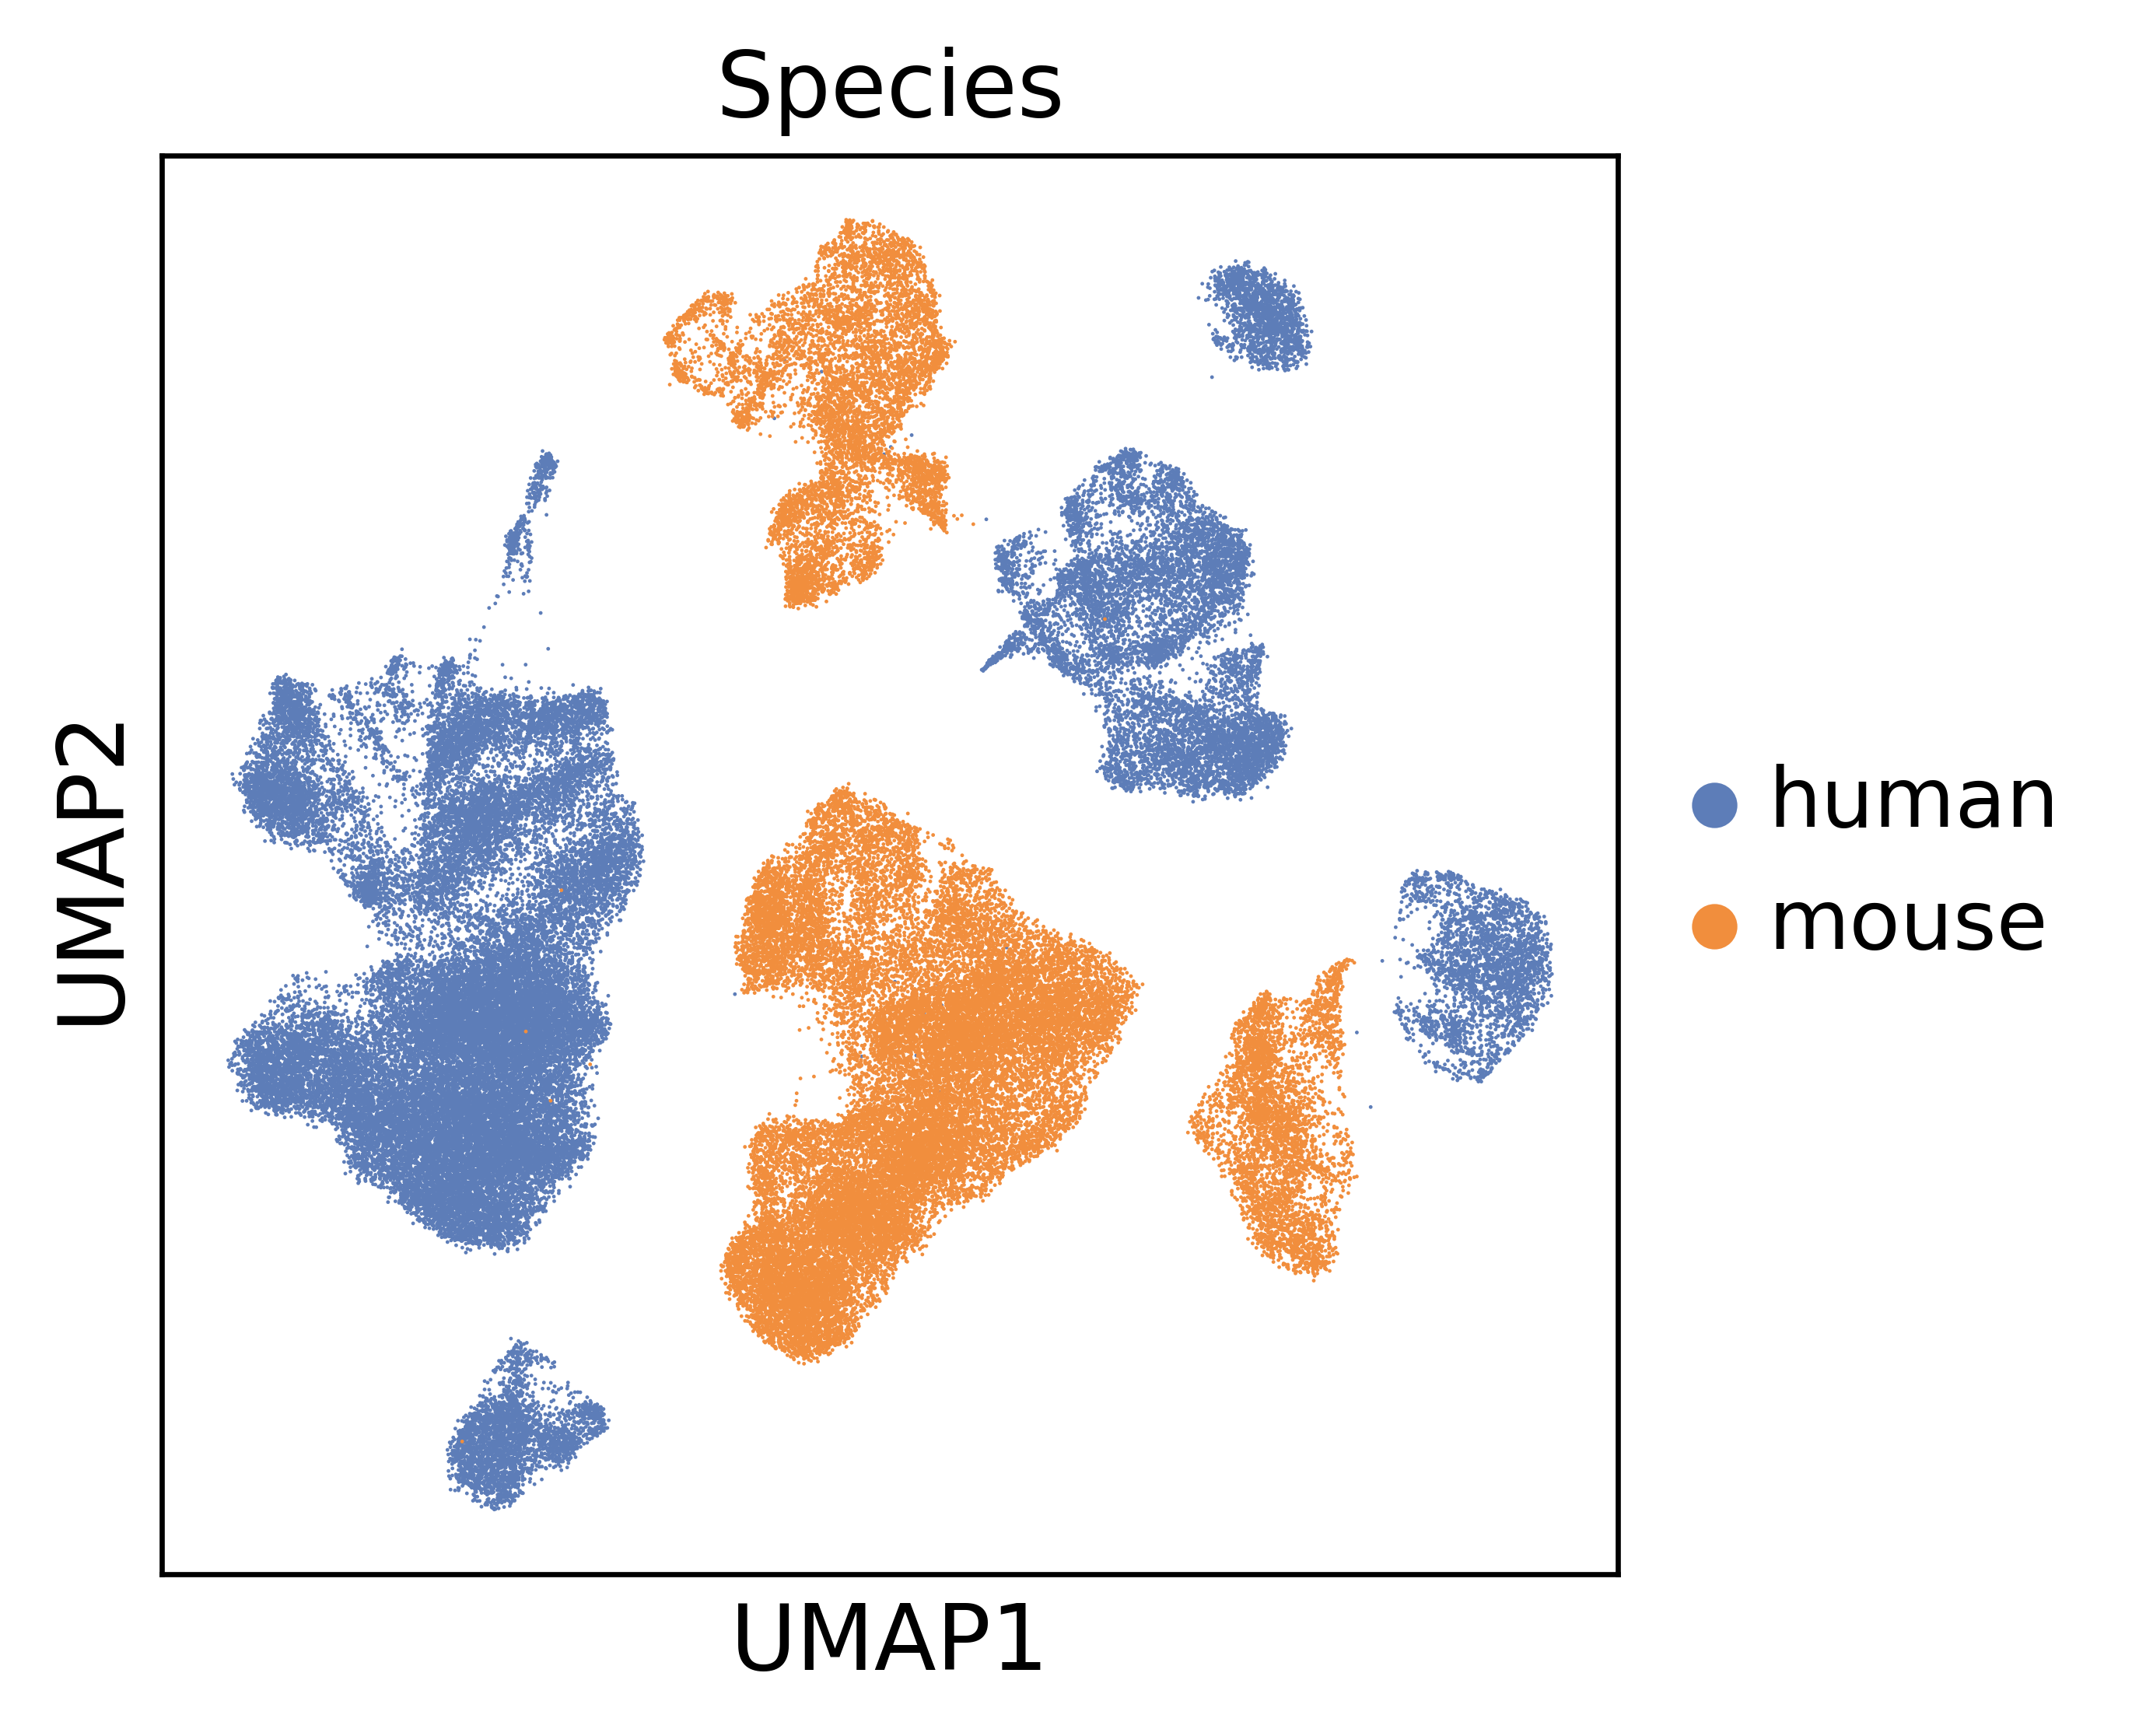

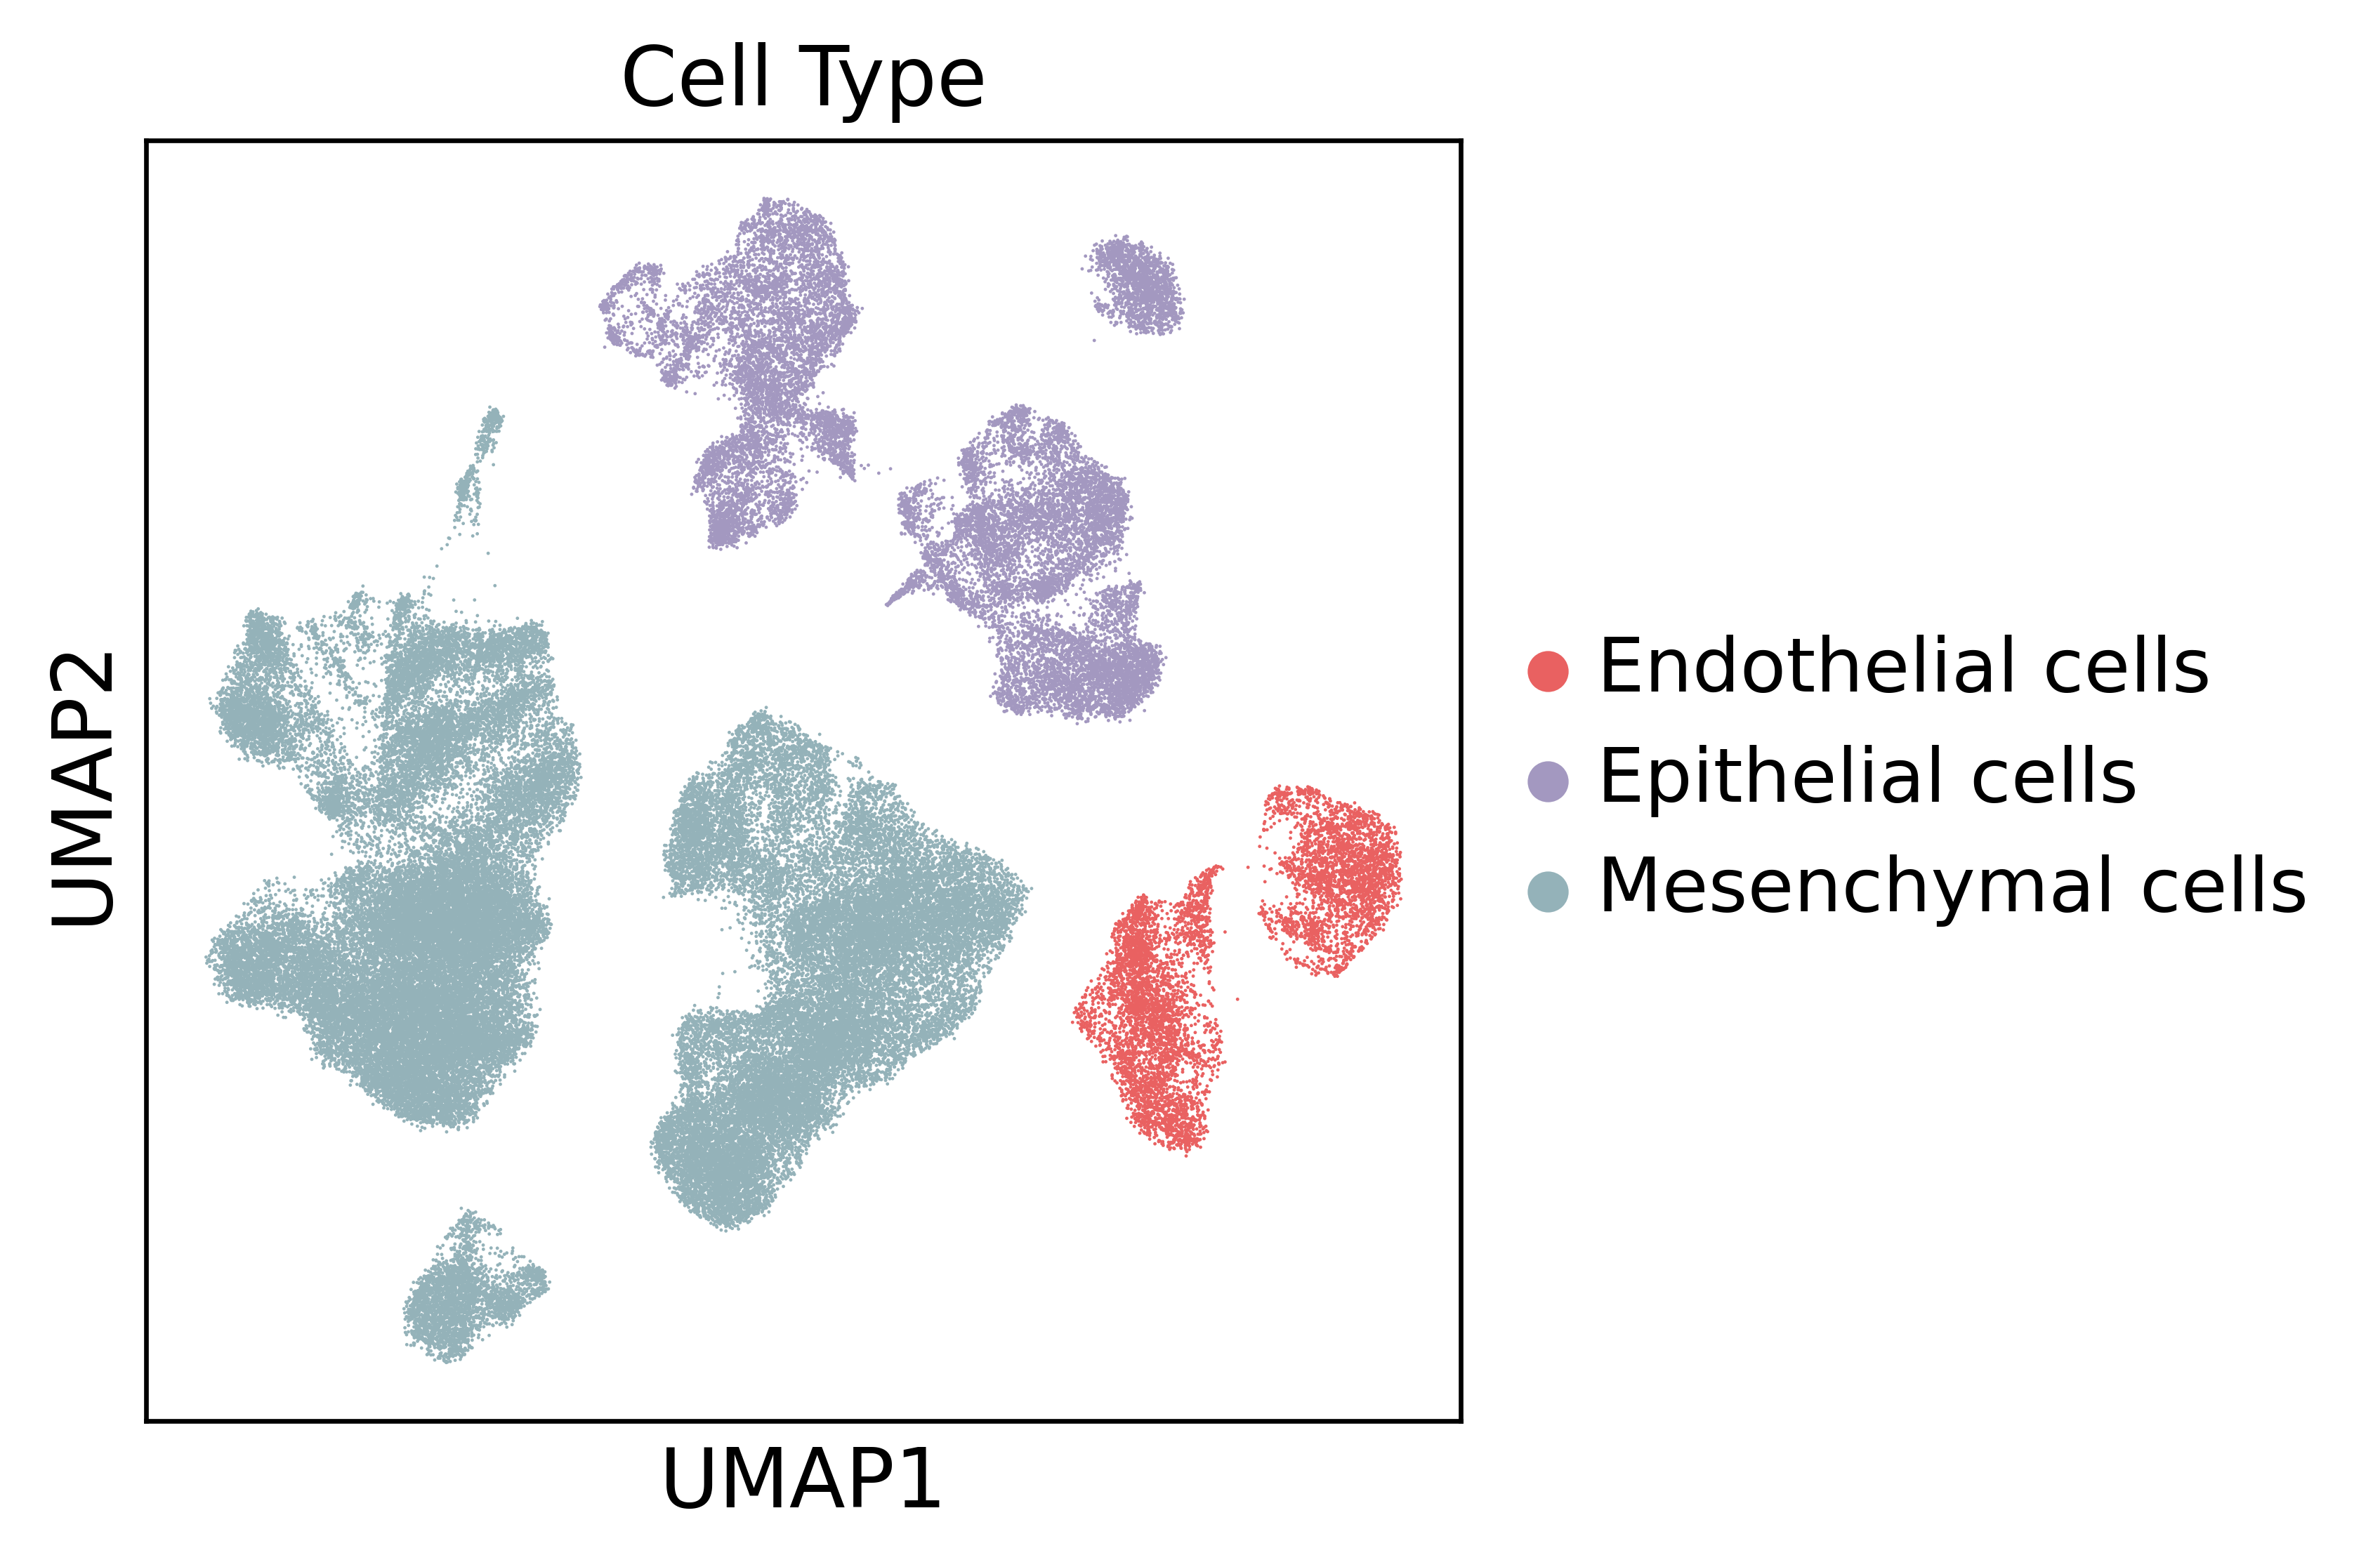

In [56]:
adata.uns['species_colors'] = ['#5D7DB8','#F18E3D']
adata.uns['labels2_colors'] = ['#E96161', '#A398C0', '#94B2B9']
sc.settings.set_figure_params(dpi=300,facecolor='white')
sc.pl.umap(adata, color="species", title="Species",save='.huamn_mouse_saturn_v2.pdf')
sc.settings.set_figure_params(dpi=300,facecolor='white')
sc.pl.umap(adata, color="labels2", title="Cell Type",save='.huamn_mouse_celltype_saturn_v2.pdf')

In [ ]:
adata.write('./SATURN_integration.h5ad')